In [1]:
# import the 'Breast Cancer' dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

breast_cancer = pd.read_csv('C:/Users/SHUBHAM.PARAB/Desktop/DigitalVidya/Datasets/Breast Cancer.csv')
print(breast_cancer.columns)
breast_cancer.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
breast_cancer.drop(['id','Unnamed: 32'],axis=1,inplace=True)
breast_cancer['diagnosis']= pd.get_dummies(breast_cancer['diagnosis'],drop_first=True)
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [4]:
X = breast_cancer.iloc[:,1:].values
y = breast_cancer.iloc[:,0].values

In [5]:
#Scaling the values to avoid overfitting on any single feature due to larger range in values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
# create an instance
pca = PCA(n_components=2)

# reduce the dimensions of the data using PCA
X = pca.fit_transform(X)

In [7]:
# Create 2 clusters for the dataset using KMeans clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Text(0.5,1,'Existing Layout')

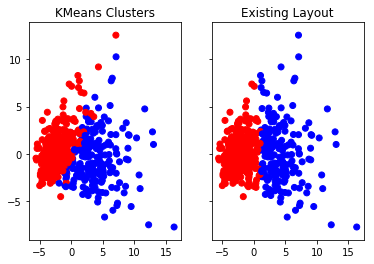

In [31]:
# visualise the KMeans clusters

colors = ['red', 'blue']
pred_colors = [colors[label] for label in kmeans.labels_]
actual_colors = [colors[label] for label in y]

# Two subplots
f, axarr = plt.subplots(1, 2, sharey=True)

axarr[0].scatter(X[:, 0], X[:, 1], c=actual_colors)
axarr[0].set_title('Actual Layout')

axarr[1].scatter(X[:, 0], X[:, 1], c=pred_colors)
axarr[1].set_title('KMeans Cluster')

In [35]:
# Create Hierarchicial clustering model using linkages : {“ward”, “complete”, “average”}
from sklearn.cluster import AgglomerativeClustering

In [36]:
# create an instance
ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
ward.fit(X)
pred_colors_ward = [colors[label] for label in ward.labels_]

complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
complete.fit(X)
pred_colors_complete = [colors[label] for label in complete.labels_]

average = AgglomerativeClustering(n_clusters=2, linkage='average')
average.fit(X)
pred_colors_average = [colors[label] for label in average.labels_]



Text(0.5,1,'KMeans Clusters')

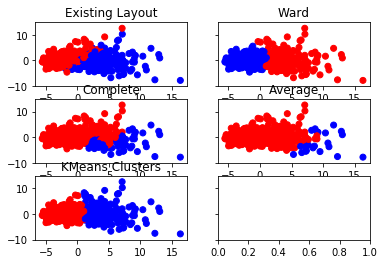

In [46]:
# visualise the clusters
f, axarr = plt.subplots(3, 2, sharey=True)

axarr[0,0].scatter(X[:, 0], X[:, 1], c=actual_colors)
axarr[0,0].set_title('Existing Layout')

axarr[0,1].scatter(X[:, 0], X[:, 1], c=pred_colors_ward)
axarr[0,1].set_title('Ward')

axarr[1,0].scatter(X[:, 0], X[:, 1], c=pred_colors_complete)
axarr[1,0].set_title('Complete')

axarr[1,1].scatter(X[:, 0], X[:, 1], c=pred_colors_average)
axarr[1,1].set_title('Average')

axarr[2,0].scatter(X[:, 0], X[:, 1], c=pred_colors)
axarr[2,0].set_title('KMeans Clusters')

In [ ]:
# Compare the results

#Considering the accuracy ward was closest to the existing layout out of the 3 hierarchical clusters.
#Overall, KMeans clustering performed better than Hierarchical methods in this case